In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [17]:
# Merge data to create a unified dataset
merged_data = transactions.merge(customers, on='CustomerID')

In [18]:
# Feature engineering: Create a summary table of customer transactions
customer_features = merged_data.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalTransactions=('TransactionID', 'count'),
    AvgTransactionValue=('TotalValue', 'mean')
).reset_index()

In [19]:
# Add customer profile information
customer_features = customer_features.merge(customers[['CustomerID', 'Region']], on='CustomerID')

In [20]:
# One-hot encode the 'Region' column
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [21]:
# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

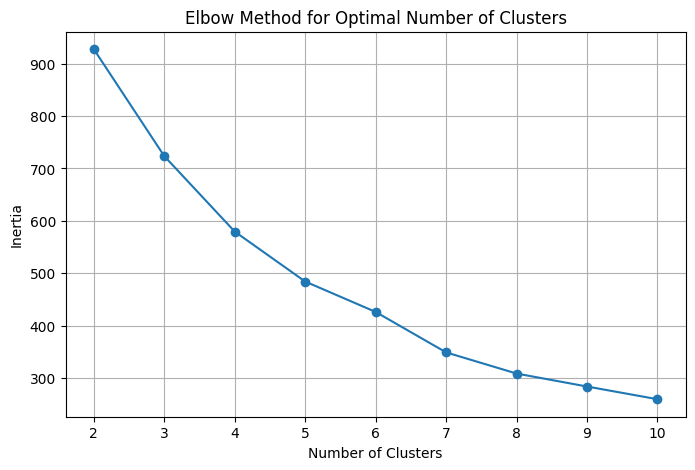

In [22]:
# Elbow Method to determine optimal number of clusters
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [23]:
# ---- Clustering ----
# Choose the number of clusters (between 2 and 10)
#num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_scaled)

KMeans(n_clusters=4, random_state=42)

In [25]:
# Add cluster labels to the dataset
customer_features['Cluster'] = kmeans.labels_

In [26]:
# Calculate Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(features_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 1.1896065659883583


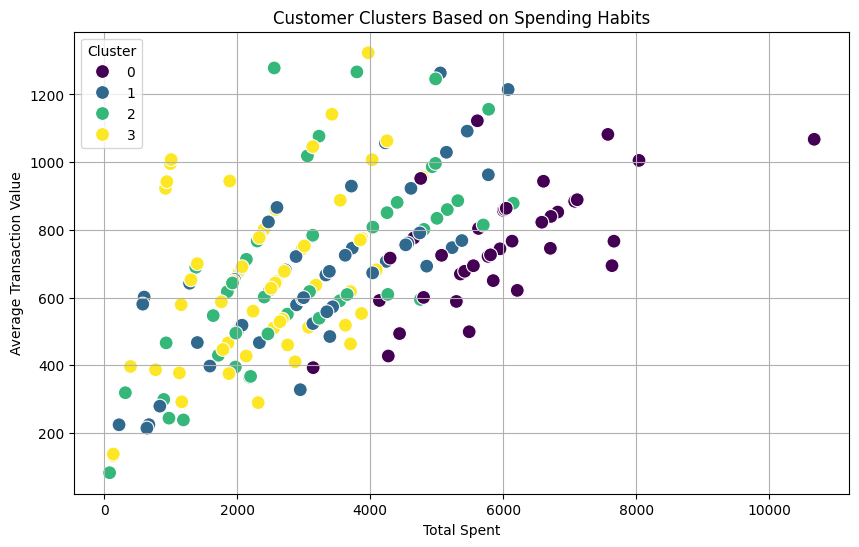

In [27]:
# ---- Visualization ----
# Visualize the clusters using TotalSpent and AvgTransactionValue
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_features,
    x='TotalSpent',
    y='AvgTransactionValue',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Customer Clusters Based on Spending Habits')
plt.xlabel('Total Spent')
plt.ylabel('Average Transaction Value')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [28]:
# ---- Results ----
# Save clustering results
customer_features[['CustomerID', 'Cluster']].to_csv('Aditya_Sherkhane_Clustering.csv', index=False)
print("Clustering results saved to 'Aditya_Sherkhane_Clustering.csv'")

Clustering results saved to 'Aditya_Sherkhane_Clustering.csv'


In [29]:
# Insights
print(f"Number of Clusters: {num_clusters}")
print(f"Davies-Bouldin Index: {db_index}")

Number of Clusters: 4
Davies-Bouldin Index: 1.1896065659883583


In [30]:
cluster_summary = customer_features.groupby('Cluster').agg(
    AvgTotalSpent=('TotalSpent', 'mean'),
    AvgTransactions=('TotalTransactions', 'mean'),
    AvgTransactionValue=('AvgTransactionValue', 'mean')
)
print(cluster_summary)


         AvgTotalSpent  AvgTransactions  AvgTransactionValue
Cluster                                                     
0          5970.580541         8.000000           760.216105
1          3211.467600         4.680000           674.496806
2          3119.412292         4.479167           689.537242
3          2480.920469         3.984375           654.341132
